
# <span style="color:rgb(213,80,0)">Tutorial 4 - Modify Material Parameters</span>
## Introduction

In this tutorial, we will use a P2D model to simulate the effects of changing material parameters on cell discharge. After completing this tutorial, you should have a working knowledge of:

-  Basics of how material properties are defined in BattMo
-  How to make some simple changes to material property definitions
-  How to change material models from the BattMo material library

We'll use the same model from Tutorial 1.


In [1]:
jsonstruct = parseBattmoJson('Examples/jsondatafiles/sample_input.json');


Parameters are defined in the JSON parameter file and parsed into the MATLAB structure. Once the JSON file has been read into MATLAB as a jsonstruct, its properties can be modified programmatically.

## Explore the Material Parameters

Let's begin by exploring the active material of the positive electrode coating with the following command:


In [2]:
disp(jsonstruct.PositiveElectrode.Coating.ActiveMaterial)

              massFraction: 0.9500
                   density: 4650
      specificHeatCapacity: 700
       thermalConductivity: 2.1000
    electronicConductivity: 100
                 Interface: [1x1 struct]
        diffusionModelType: 'full'
            SolidDiffusion: [1x1 struct]


We can see that a variety of parameters are defined that determine the physicochemical properties of the material. Many of the parameters that describe the electrochemical reactions that take place at the active material - electrolyte interface are contained in the Interface structure, which we can explore with the command:


In [3]:
disp(jsonstruct.PositiveElectrode.Coating.ActiveMaterial.Interface)

         saturationConcentration: 55554
           volumetricSurfaceArea: 885000
                         density: 4650
    numberOfElectronsTransferred: 1
      activationEnergyOfReaction: 5000
            reactionRateConstant: 2.3300e-11
           guestStoichiometry100: 0.4955
             guestStoichiometry0: 0.9917
       chargeTransferCoefficient: 0.5000
            openCircuitPotential: [1x1 struct]


Furthermore, it is well known that the diffusion of lithium in the active materials can be a limiting factor in Li-ion battery performance. The diffusion model used in this simulation can be explored with the following command:


In [4]:
disp(jsonstruct.PositiveElectrode.Coating.ActiveMaterial.SolidDiffusion)

      activationEnergyOfDiffusion: 5000
    referenceDiffusionCoefficient: 1.0000e-14
                   particleRadius: 1.0000e-06
                                N: 10


We can see there that the solid diffusion model includes a reference diffusion coefficient, activation energy of diffusion, and the effective particle radius.

## Make a Simple Change

Let's make a simple change to the positive electrode active material properties in our model and see how it affects the results. Let's compare how c


In [5]:
% create a vector of diffent thickness values
radius = [1, 5, 10].*1e-6;

% instantiate and empty cell array to store the outputs of the simulations
output = cell(size(radius));

% instantiate an empty figure
figure()

% use a for-loop to iterate through the vector of c-rates
for i = 1 : numel(radius)
    % modify the value for the c-rate in the control definition and update
    % the total duration of the simulation accordingly
    jsonstruct.PositiveElectrode.Coating.ActiveMaterial.SolidDiffusion.particleRadius = radius(i);

    % run the simulation and store the results in the output cell array
    output{i} = runBatteryJson(jsonstruct);

    % retrieve the states from the simulation result
    states = output{i}.states;

    % extract the time and voltage quantities
    time = cellfun(@(state) state.time, states);
    voltage = cellfun(@(state) state.('Control').E, states);
    current = cellfun(@(state) state.('Control').I, states);

    % calculate the capacity
    capacity = time .* current;

    % plot the discharge curve in the figure
    plot((capacity/(milli*hour)), voltage, '-', 'linewidth', 3)
    hold on
end

Solving timestep 01/45:                      -> 3 Seconds, 937 Milliseconds
Solving timestep 02/45: 3 Seconds, 937 Milliseconds -> 7 Seconds, 875 Milliseconds
Solving timestep 03/45: 7 Seconds, 875 Milliseconds -> 15 Seconds, 750 Milliseconds
Solving timestep 04/45: 15 Seconds, 750 Milliseconds -> 31 Seconds, 500 Milliseconds
Solving timestep 05/45: 31 Seconds, 500 Milliseconds -> 63 Seconds
Solving timestep 06/45: 63 Seconds           -> 126 Seconds
Solving timestep 07/45: 126 Seconds          -> 252 Seconds
Solving timestep 08/45: 252 Seconds          -> 378 Seconds
Solving timestep 09/45: 378 Seconds          -> 504 Seconds
Solving timestep 10/45: 504 Seconds          -> 630 Seconds
Solving timestep 11/45: 630 Seconds          -> 756 Seconds
Solving timestep 12/45: 756 Seconds          -> 882 Seconds
Solving timestep 13/45: 882 Seconds          -> 1008 Seconds
Solving timestep 14/45: 1008 Seconds         -> 1134 Seconds
Solving timestep 15/45: 1134 Seconds         -> 1260 Seconds
So


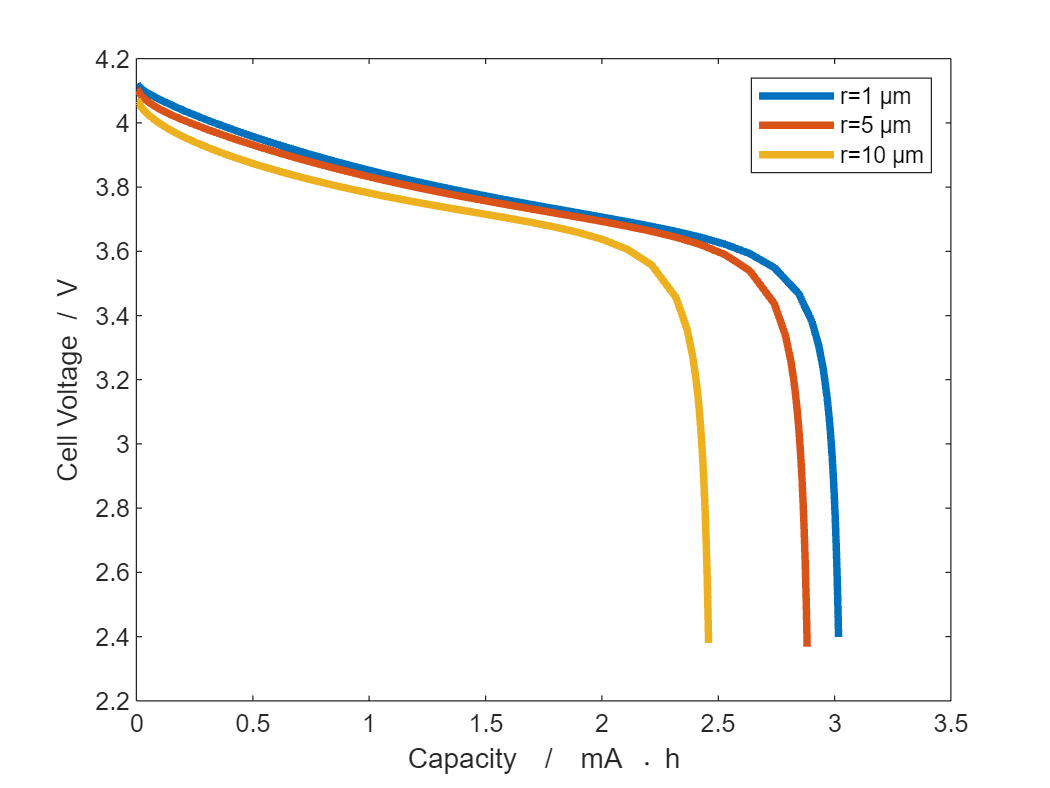

In [6]:
hold off

% add plot annotations
xlabel('Capacity  /  mA \cdot h')
ylabel('Cell Voltage  /  V')

% we can pull the radius values directly from the vector to make the plot
% annotations more resilient to changes in the code
legend(strcat('r=', num2str(radius(1)/micro), ' µm'), strcat('r=', num2str(radius(2)/micro), ' µm'), strcat('r=', num2str(radius(3)/micro), ' µm'))

## Swap Active Materials

Now let's try to replace the active material with a different material from the BattMo library. In this example, we will replace the NMC material with LFP. First, let's re-load our baseline example parameter set to get rid of the changes from the previous sections.


In [7]:
clear
jsonstruct = parseBattmoJson('Examples/jsondatafiles/sample_input.json');


Now we load and parse the LFP material parameters from the **BattMo** library and move it to the right place in the model hierarchy:


In [8]:
lfp = parseBattmoJson('ParameterData/MaterialProperties/LFP/LFP.json');
jsonstruct_lfp.PositiveElectrode.Coating.ActiveMaterial.Interface = lfp;


To merge new parameter data into our existing model, we can use the **BattMo** function <samp>mergeJsonStructs</samp>.


In [9]:
jsonstruct = mergeJsonStructs({jsonstruct_lfp, ...
                              jsonstruct});

parameter PositiveElectrode.Coating.ActiveMaterial.Interface.saturationConcentration is assigned twice with different values. we use the value from first jsonstruct.
parameter PositiveElectrode.Coating.ActiveMaterial.Interface.volumetricSurfaceArea is assigned twice with different values. we use the value from first jsonstruct.
parameter PositiveElectrode.Coating.ActiveMaterial.Interface.density is assigned twice with different values. we use the value from first jsonstruct.
parameter PositiveElectrode.Coating.ActiveMaterial.Interface.activationEnergyOfReaction is assigned twice with different values. we use the value from first jsonstruct.
parameter PositiveElectrode.Coating.ActiveMaterial.Interface.reactionRateConstant is assigned twice with different values. we use the value from first jsonstruct.
parameter PositiveElectrode.Coating.ActiveMaterial.Interface.guestStoichiometry100 is assigned twice with different values. we use the value from first jsonstruct.
parameter PositiveElectr


We need to be sure that the parameters are consistent across the hierarchy:


In [10]:
jsonstruct.PositiveElectrode.Coating.ActiveMaterial.density = jsonstruct.PositiveElectrode.Coating.ActiveMaterial.Interface.density;
jsonstruct.PositiveElectrode.Coating.effectiveDensity = 900;


And now, we can run the simulation and plot the discharge curve:


In [11]:
% run the simulation
output = runBatteryJson(jsonstruct);

Solving timestep 01/45:                      -> 3 Seconds, 937 Milliseconds
Solving timestep 02/45: 3 Seconds, 937 Milliseconds -> 7 Seconds, 875 Milliseconds
Solving timestep 03/45: 7 Seconds, 875 Milliseconds -> 15 Seconds, 750 Milliseconds
Solving timestep 04/45: 15 Seconds, 750 Milliseconds -> 31 Seconds, 500 Milliseconds
Solving timestep 05/45: 31 Seconds, 500 Milliseconds -> 63 Seconds
Solving timestep 06/45: 63 Seconds           -> 126 Seconds
Solving timestep 07/45: 126 Seconds          -> 252 Seconds
Solving timestep 08/45: 252 Seconds          -> 378 Seconds
Solving timestep 09/45: 378 Seconds          -> 504 Seconds
Solving timestep 10/45: 504 Seconds          -> 630 Seconds
Solving timestep 11/45: 630 Seconds          -> 756 Seconds
Solving timestep 12/45: 756 Seconds          -> 882 Seconds
Solving timestep 13/45: 882 Seconds          -> 1008 Seconds
Solving timestep 14/45: 1008 Seconds         -> 1134 Seconds
Solving timestep 15/45: 1134 Seconds         -> 1260 Seconds
So


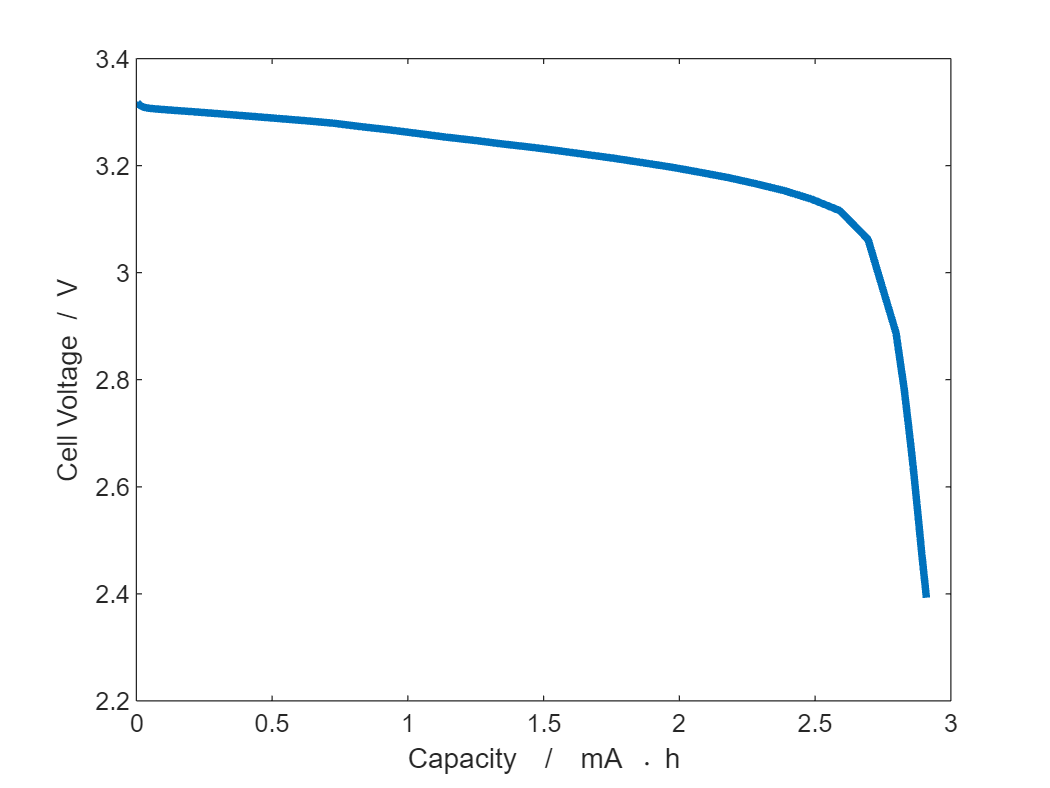

In [12]:
% get the states
states = output.states;

% extract the time and voltage quantities
time = cellfun(@(state) state.time, states);
voltage = cellfun(@(state) state.('Control').E, states);
current = cellfun(@(state) state.('Control').I, states);

% calculate the capacity
capacity = time .* current;

% plot the discharge curve in the figure
plot((capacity/(milli*hour)), voltage, '-', 'linewidth', 3)

% add plot annotations
xlabel('Capacity  /  mA \cdot h')
ylabel('Cell Voltage  /  V')

## Summary

In this tutorial, we explored how to modify material parameters in BattMo. We first explored the material parameter structure. Then we modified the effective particle radius and simulated its affect on the cell discharge curve. Finally we swapped out the NMC active material for a LFP material and simulated the new performance of the cell.

